Virat Kohli Perfomance analysis of all the ODI matches played by Virat Kohli from 18 August 2008 to 22 January 2017.


Below is the complete information about all the columns in the dataset:

1.Runs: Runs in the match
2.BF: Balls faced in the match
3.4s: number of 4s in a match
4.6s: number of 6s in a match
5.SR: Strike Rate in the match
6.Pos: Batting Position in the match
7.Dismissal: How Virat Kohli got out in the match
8.Inns: 1st and 2nd innings
9.Opposition: Who was the opponent of India
10.Ground: Venue of the match
11.Start Date: Date of the match

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

data = pd.read_csv("ViratKohli.csv")
print(data.head())

   Runs  BF  4s  6s     SR  Pos Dismissal  Inns   Opposition        Ground  \
0    12  22   1   0  54.54    2       lbw     1  v Sri Lanka      Dambulla   
1    37  67   6   0  55.22    2    caught     2  v Sri Lanka      Dambulla   
2    25  38   4   0  65.79    1   run out     1  v Sri Lanka  Colombo(RPS)   
3    54  66   7   0  81.82    1    bowled     1  v Sri Lanka  Colombo(RPS)   
4    31  46   3   1  67.39    1       lbw     2  v Sri Lanka  Colombo(RPS)   

  Start Date  
0  18-Aug-08  
1  20-Aug-08  
2  24-Aug-08  
3  27-Aug-08  
4  29-Aug-08  


In [5]:
print(data.isnull().sum())

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64


We took a look at whether this dataset contains any null values or not before moving forward. 

In [6]:
# Total Runs Between 18-Aug-08 - 22-Jan-17
data["Runs"].sum()

6184

In [7]:
# Average Runs Between 18-Aug-08 - 22-Jan-17
data["Runs"].mean()

46.84848484848485

Virat Kohli had an average of almost 50 during this time frame cementing to the fact that why he is one of the best.

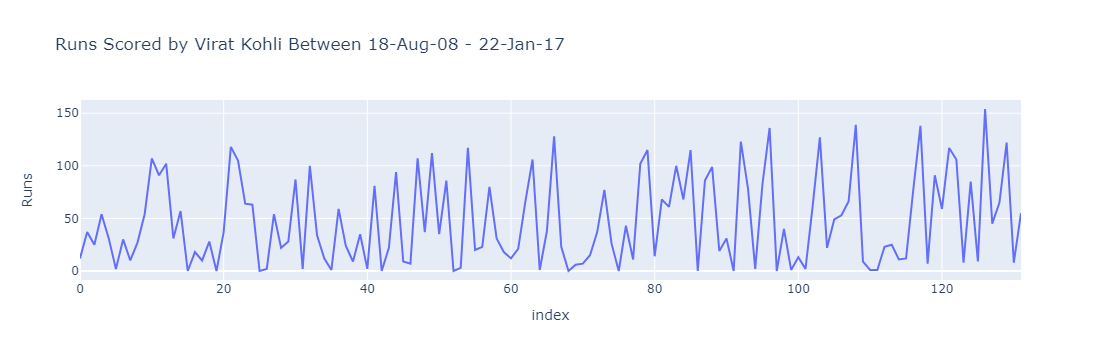

In [8]:
matches = data.index
figure = px.line(data, x=matches, y="Runs", 
                 title='Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17')
figure.show()

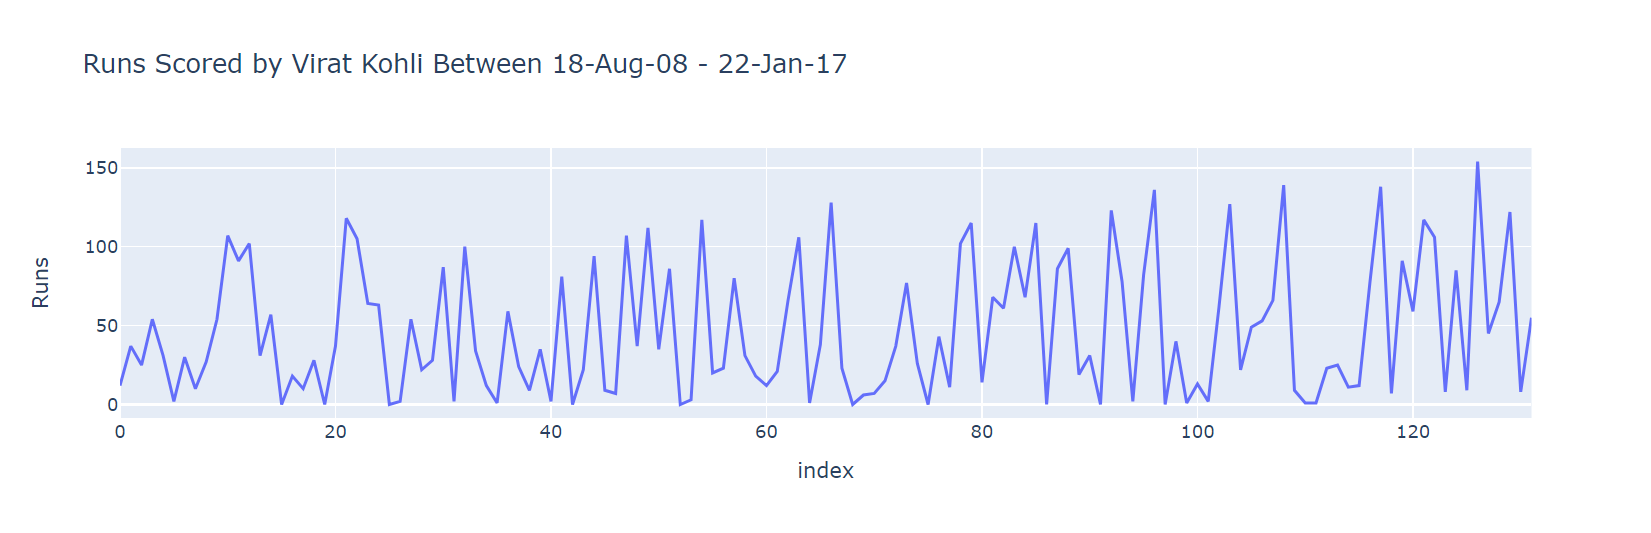

In so many innings played by Virat Kohli, he scored a 100 or close to it. A relentless force in ODI cricket, known for his unparalleled consistency and insatiable hunger for runs, it is clearly shown by this graph. Now let’s see all the batting positions played by Virat Kohli:

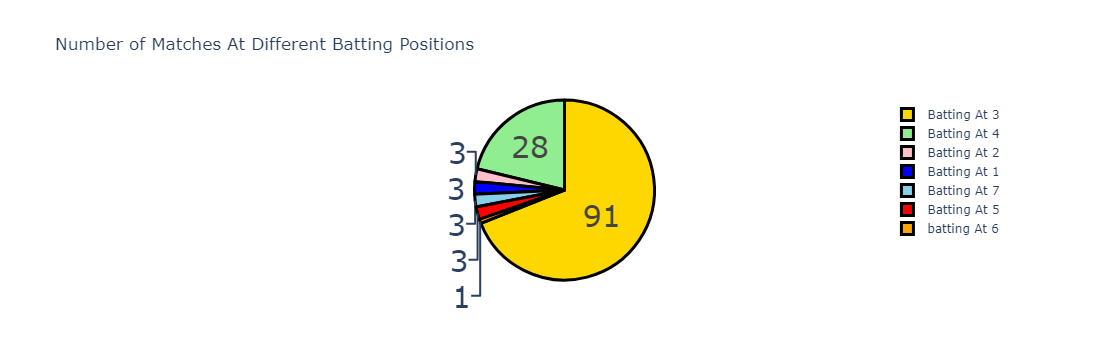

In [9]:
# Batting Positions
data["Pos"] = data["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2", 
                               1.0: "Batting At 1", 7.0:"Batting At 7", 5.0:"Batting At 5", 
                               6.0: "batting At 6"})

Pos = data["Pos"].value_counts()
label = Pos.index
counts = Pos.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "red", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

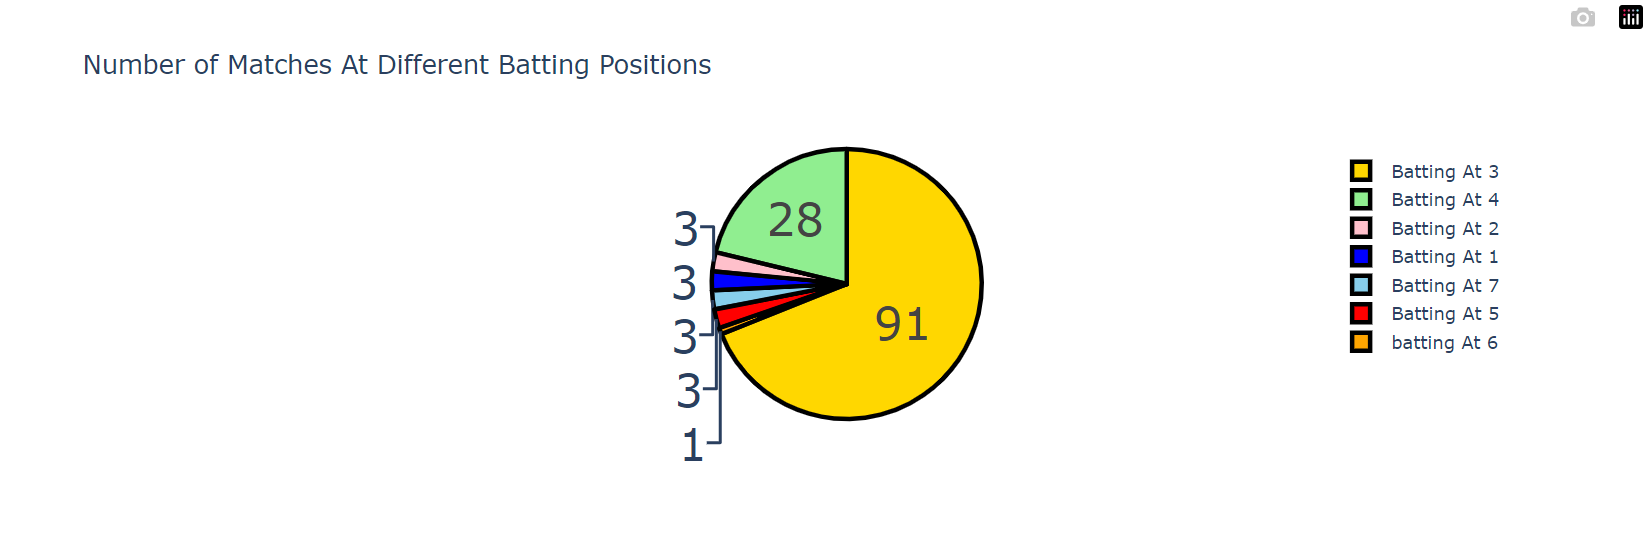

In more than 68% of all the innings played by Virat Kohli, he batted in his iconic and trademark number three position. Now let’s have a look at the total runs scored by Virat Kohli in different positions:

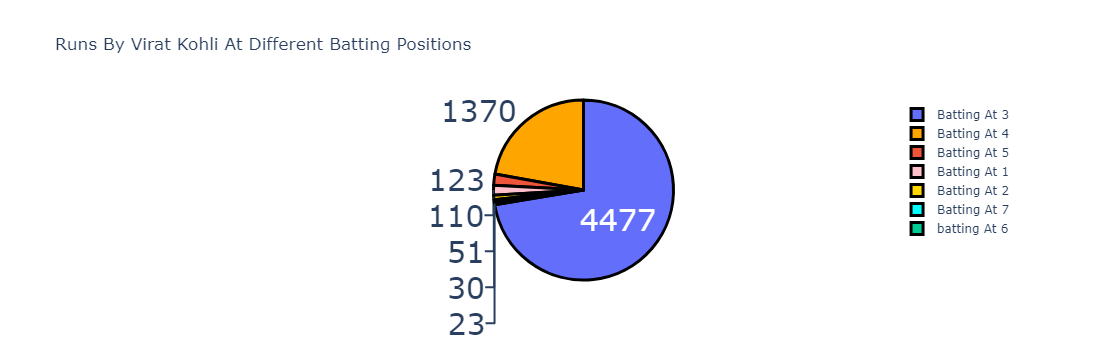

In [10]:
label = data["Pos"]
counts = data["Runs"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Runs By Virat Kohli At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

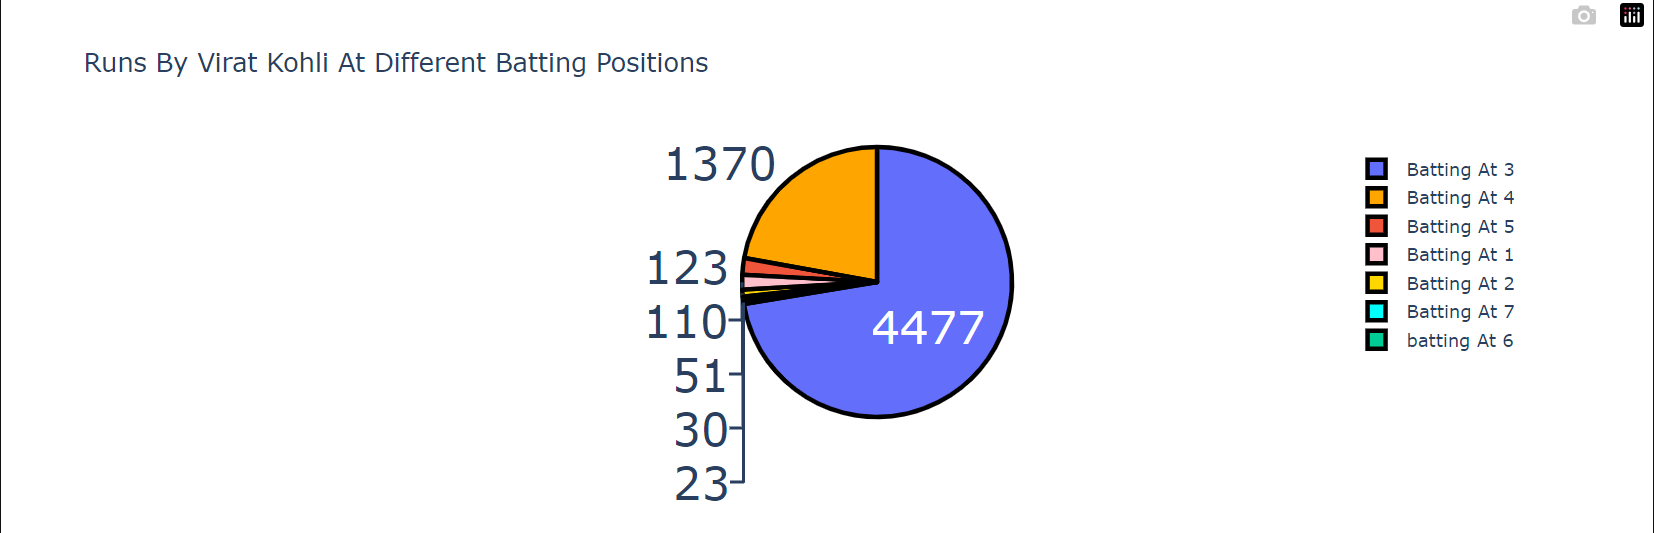

More than 72% of the total runs scored by Virat Kohli are while batting at 3rd position. So there is no doubt that batting at 3rd position is perfect for him.
Now let’s have a look at the number of centuries scored by Virat Kohli while batting in the first innings and second innings:

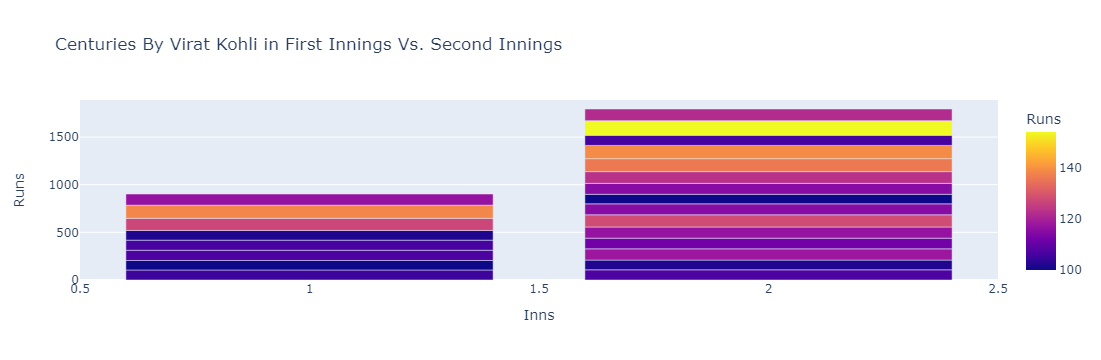

In [11]:
centuries = data.query("Runs >= 100")
figure = px.bar(centuries, x=centuries["Inns"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Centuries By Virat Kohli in First Innings Vs. Second Innings")
figure.show()

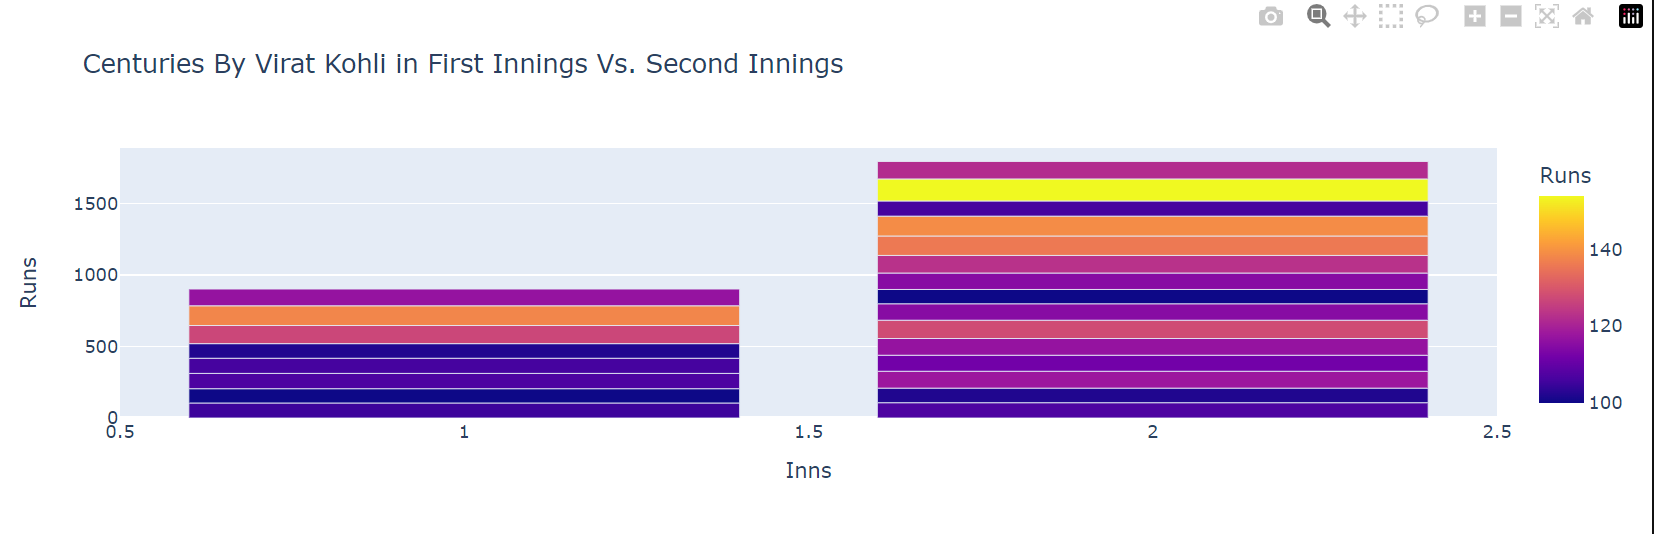

As he is famously known as the chasemaster, we can see how most of the centuries are scored while batting in the second innings. By this, we can confirm the fact that Virat Kohli really comes into his best self while chasing. Now let’s have a look at the kind of dismissals Virat Kohli faced most of the time:

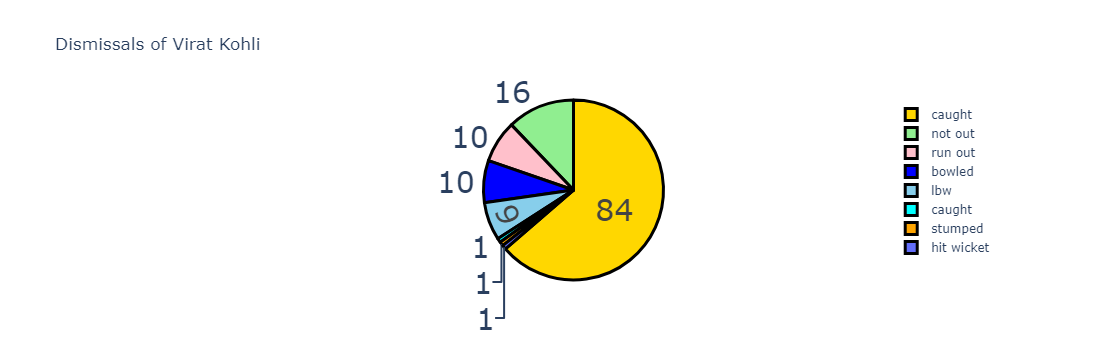

In [12]:
# Dismissals of Virat Kohli
dismissal = data["Dismissal"].value_counts()
label = dismissal.index
counts = dismissal.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Dismissals of Virat Kohli')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

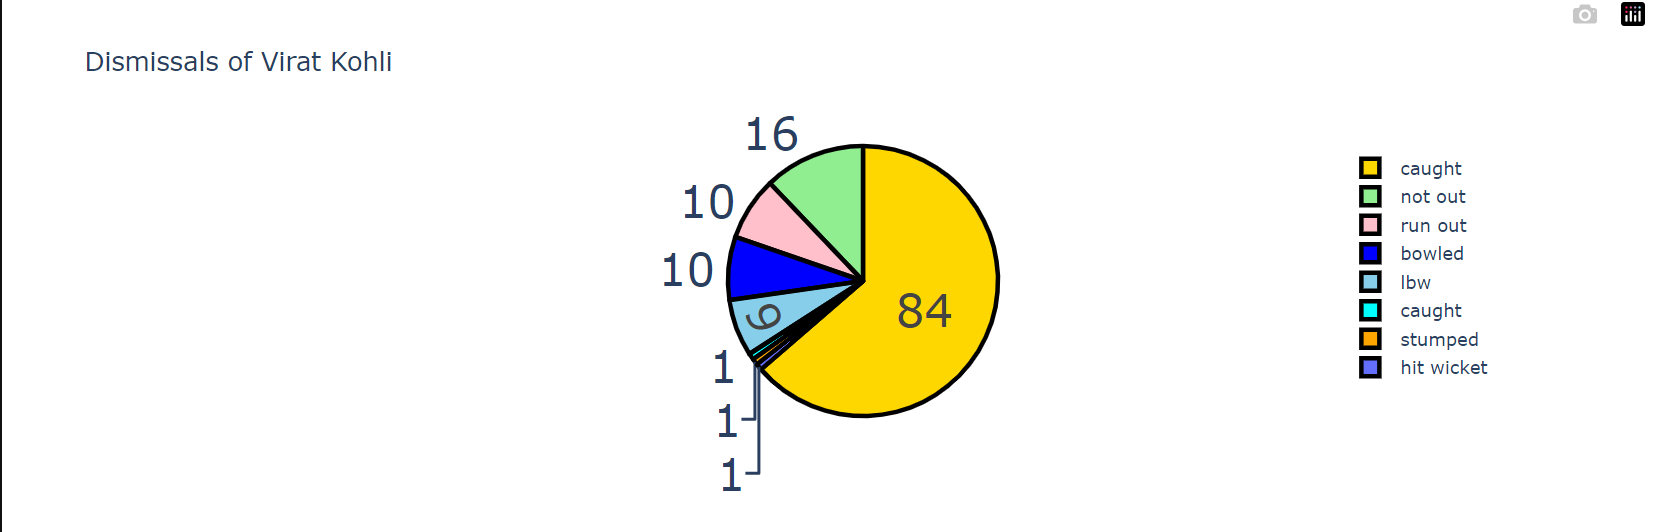

So Almost 85% of the time, Virat Kohli gets out by getting caught by the fielder or the keeper. Now let’s have a look at against which team Virat Kohli scored most of his runs:

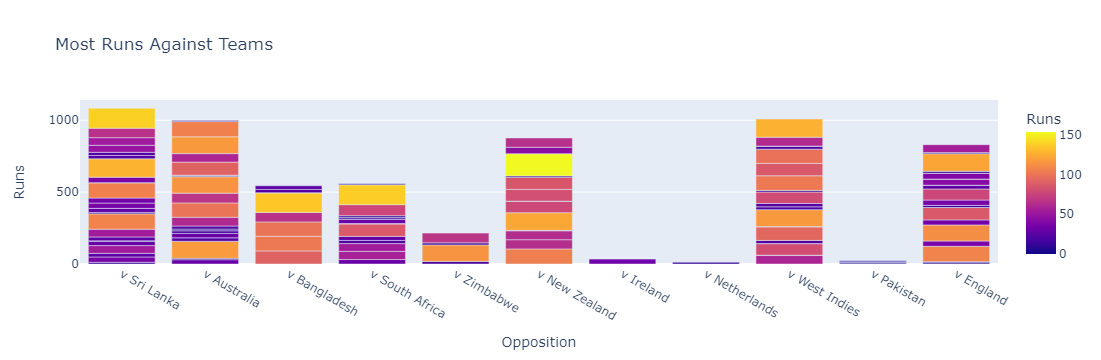

In [13]:
figure = px.bar(data, x=data["Opposition"], y = data["Runs"], color = data["Runs"],
            title="Most Runs Against Teams")
figure.show()

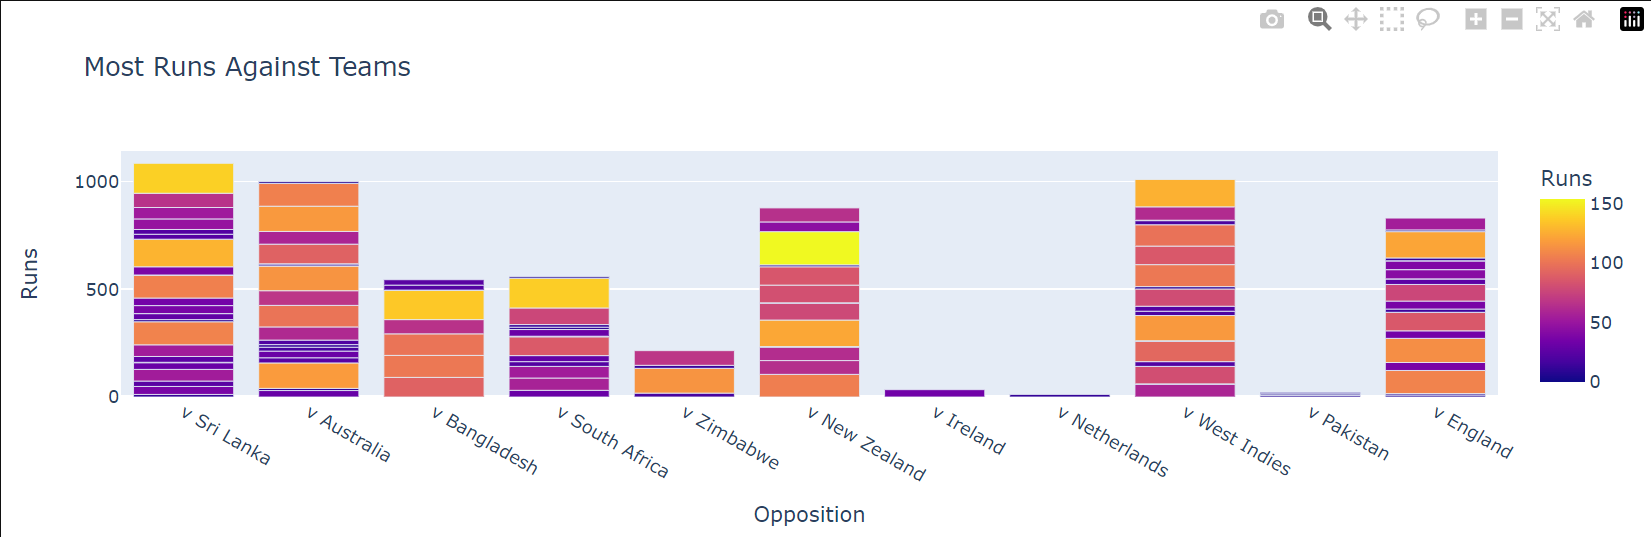

According to the above figure, Virat Kohli likes batting against Sri Lanka, Australia, New Zealand, West Indies, and England. But he scored most of his runs while batting against Sri Lanka. Now let’s have a look at against which team Virat Kohli scored most of his centuries:

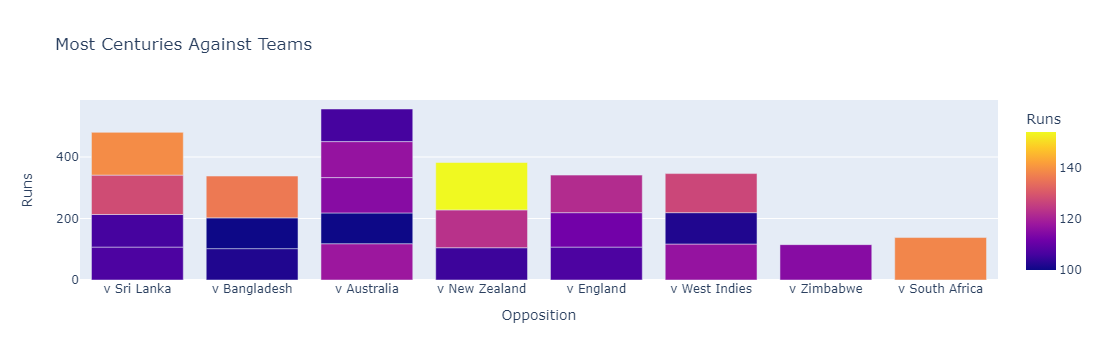

In [14]:
figure = px.bar(centuries, x=centuries["Opposition"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Most Centuries Against Teams")
figure.show()

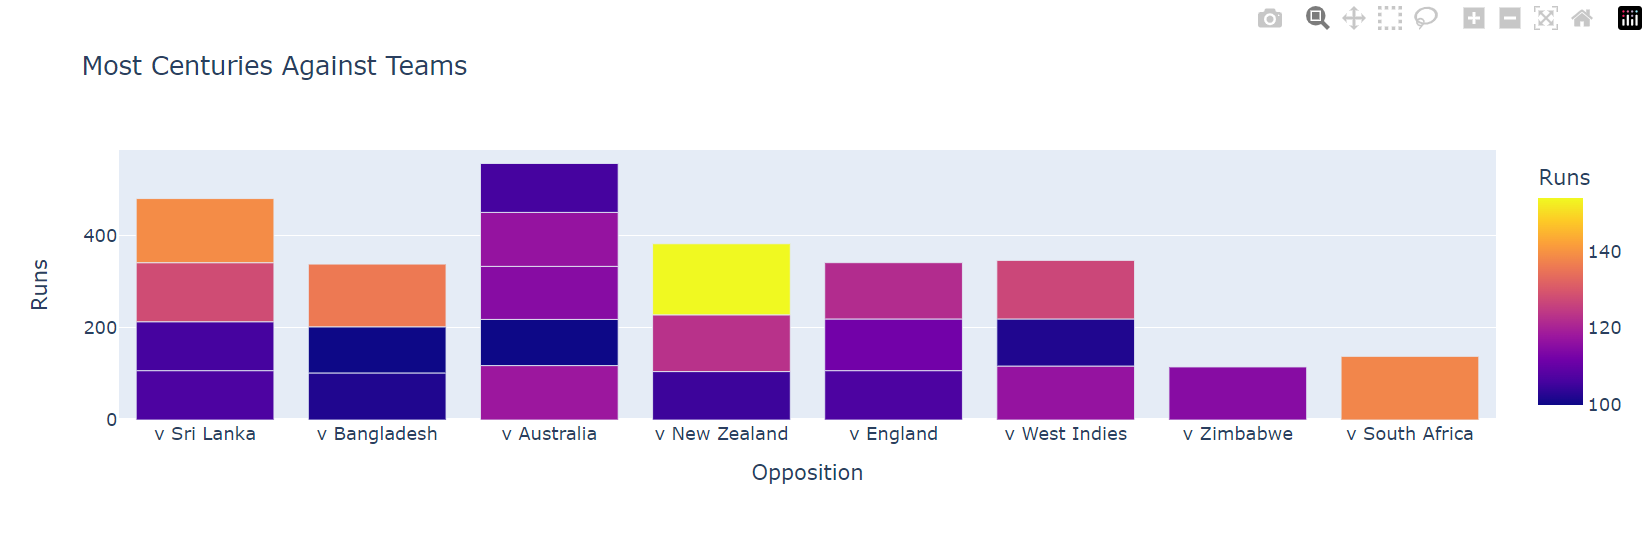

So, most of the centuries scored by Virat Kohli were against Australia. Now let’s analyze Virat Kohli’s strike rate. To analyze Virat Kohli’s strike rate, I had to create a new dataset of all the matches played by Virat Kohli where his strike rate was more than 100:

In [16]:
strike_rate = data.query("SR >= 100")
print(strike_rate)

     Runs   BF  4s  6s      SR           Pos   Dismissal  Inns  \
5       2    2   0   0  100.00  Batting At 7     not out     1   
8      27   19   4   0  142.11  Batting At 7      bowled     1   
12    102   95  11   0  107.37  Batting At 3     not out     2   
22    105  104  10   0  100.96  Batting At 3      caught     1   
32    100   83   8   2  120.48  Batting At 4     not out     1   
45      9    9   0   0  100.00  Batting At 4      caught     1   
47    107   93   9   1  115.05  Batting At 4  hit wicket     1   
49    112   98  16   0  114.29  Batting At 4     not out     2   
50     35   30   5   0  116.67  Batting At 4         lbw     2   
56     23   11   3   0  209.09  batting At 6     not out     1   
66    128  119  12   1  107.56  Batting At 3     not out     2   
76     43   34   4   1  126.47  Batting At 3      caught     1   
78    102   83  13   2  122.89  Batting At 3      caught     1   
79    115  108  13   1  106.48  Batting At 3      caught     2   
83    100 

Now let’s compare whether Virat Kohli plays with high strike rates in the first innings or second innings:

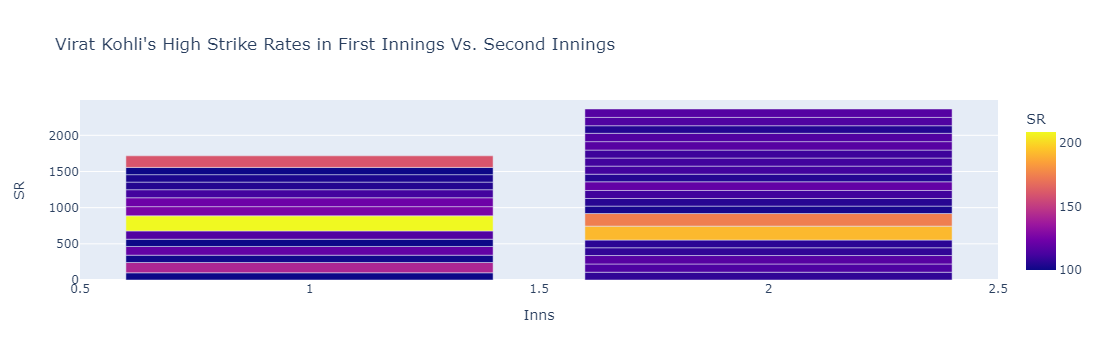

In [17]:
figure = px.bar(strike_rate, x = strike_rate["Inns"], 
                y = strike_rate["SR"], 
                color = strike_rate["SR"],
            title="Virat Kohli's High Strike Rates in First Innings Vs. Second Innings")
figure.show()

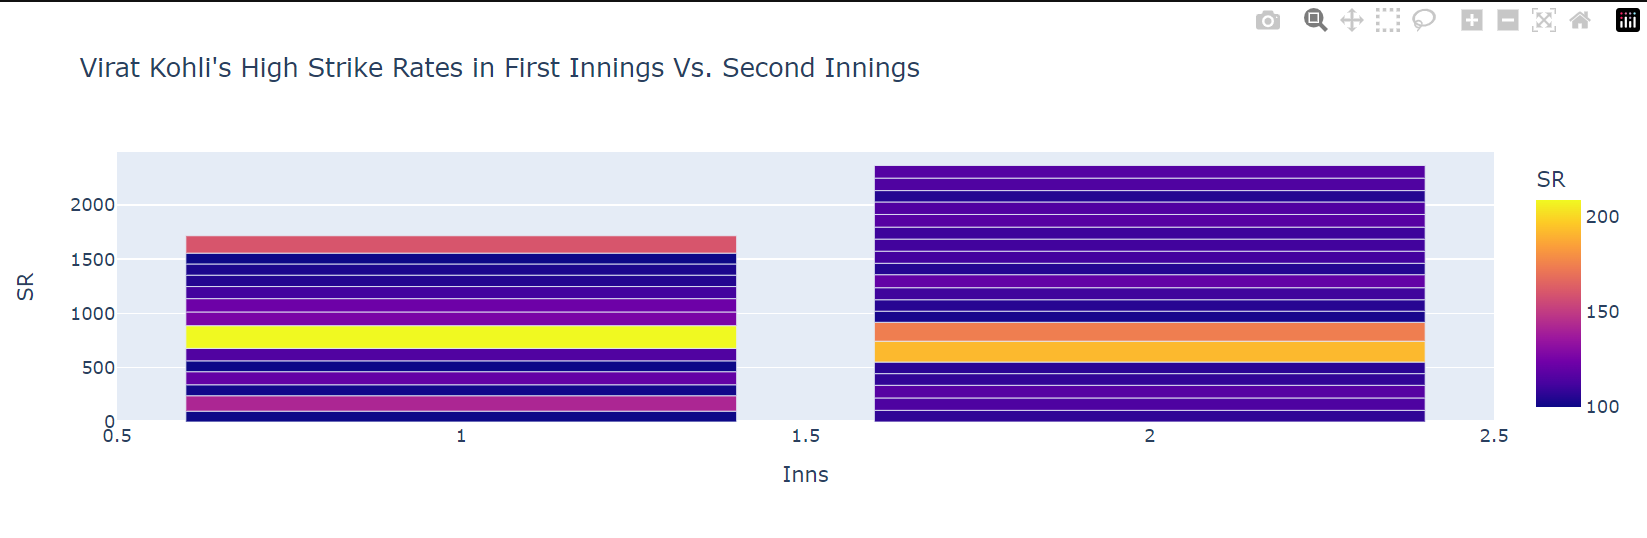

So according to the above figure and as is known widely accross the world, Virat Kohli likes playing more aggressively in the second innings compared to the first innings. Now let’s see the relationship between runs scored by Virat Kohli and fours played by him in each innings:

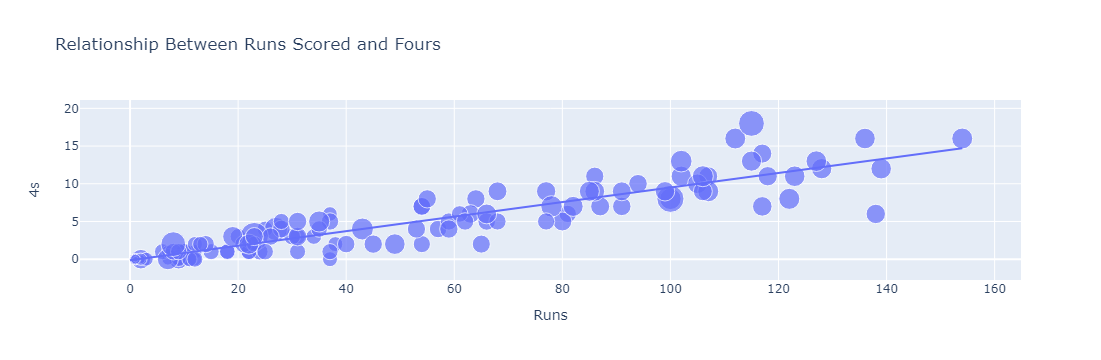

In [26]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="4s", size="SR", trendline="ols", 
                    title="Relationship Between Runs Scored and Fours")
figure.show()

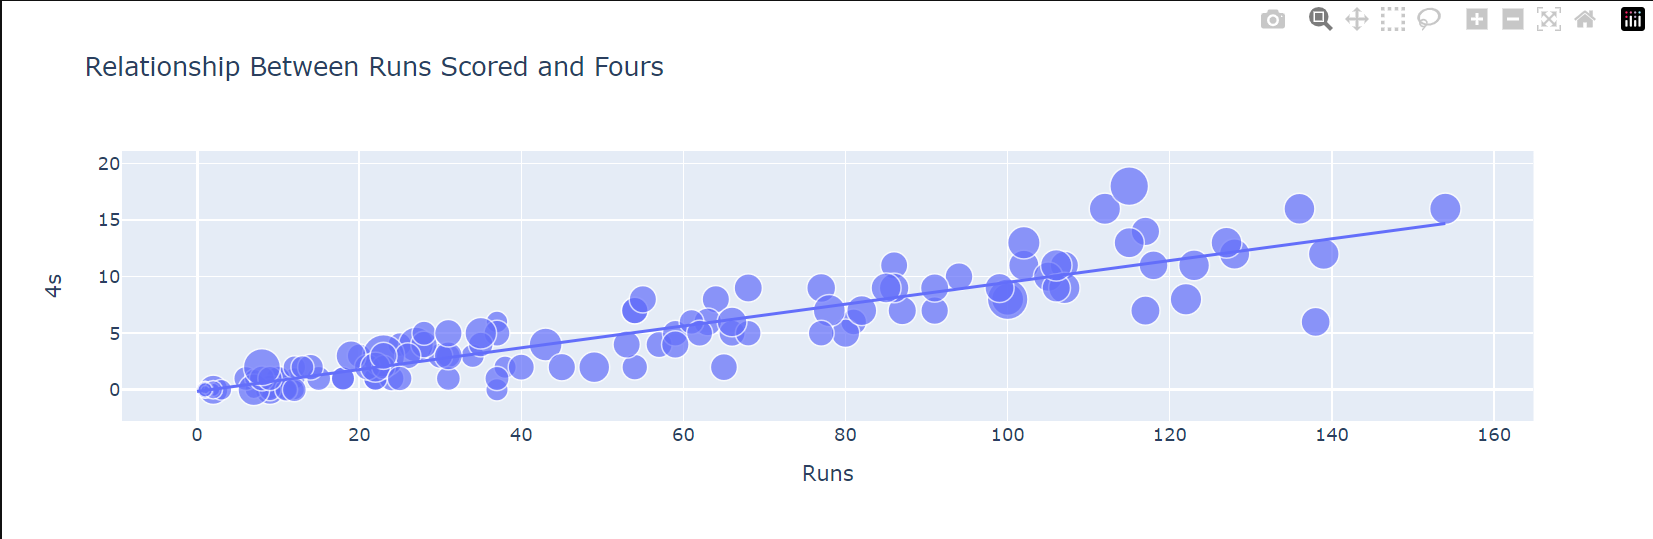

There is a linear relationship. It means that Virat Kohli likes playing fours and keeping it safe while scoring runs. The more runs he scores in the innings, the more fours he plays. Let’s see if there is some relationship with the sixes:

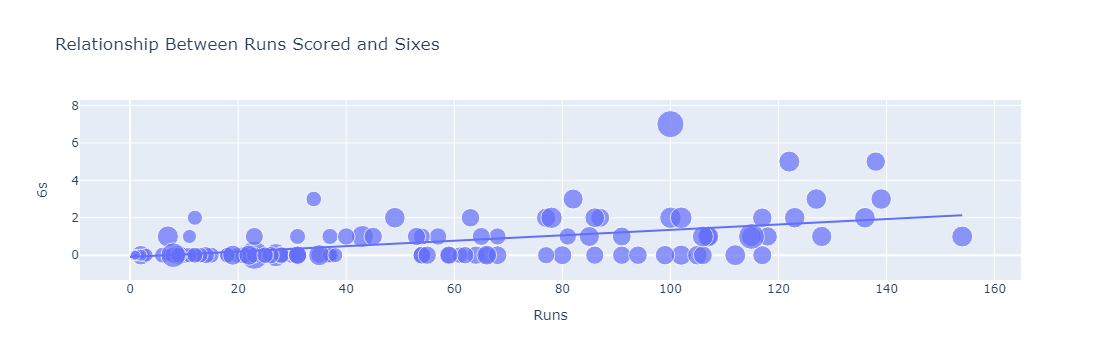

In [27]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="6s", size="SR", trendline="ols", 
                    title= "Relationship Between Runs Scored and Sixes")
figure.show()

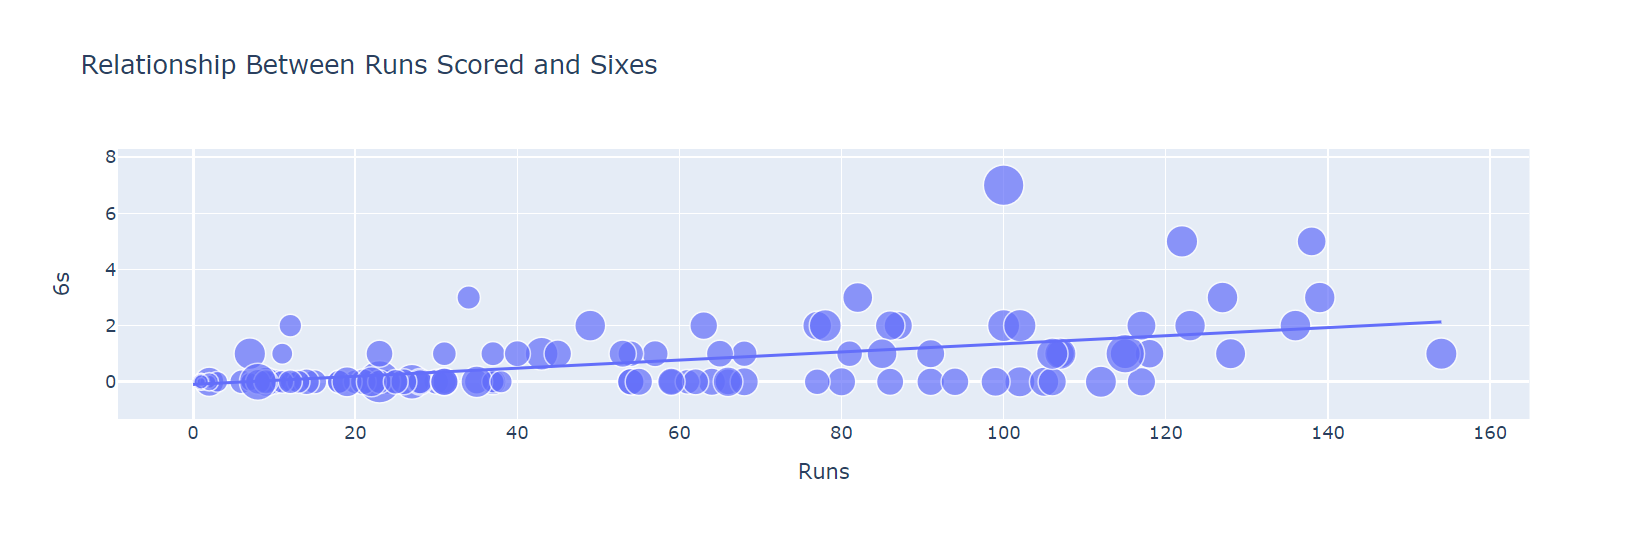

There is no strong linear relationship here. It means Virat Kohli likes playing fours more than sixes. 

Summary:

In this analysis of Virat Kohli's ODI batting performance from August 18, 2008, to January 22, 2017, using Python, several key insights were discovered.

1.Total Runs and Batting Average: Virat Kohli amassed a total of 6184 runs with an impressive batting average of 46.85 during this period, indicating his consistent and prolific scoring ability.

2.Runs Trend Over Time: The trend analysis showed fluctuations in Kohli's run-scoring pattern over the years, with numerous instances of scoring over 100 runs in an innings, highlighting his consistency and ability to convert starts into big scores.

3.Batting Positions: Kohli predominantly batted at the third position (68% of innings), where he showcased remarkable performance, contributing more than 72% of his total runs from this position.

4.Centuries and Innings: Most of Kohli's centuries were scored while batting in the second innings, suggesting his proficiency in chasing targets and performing under pressure.

5.Dismissals: Kohli was most frequently dismissed by getting caught by fielders or the wicketkeeper, indicating areas where opposing teams could target his weaknesses.

6.Performance Against Opponents: Kohli performed exceptionally well against teams like Sri Lanka, Australia, New Zealand, West Indies, and England, with Sri Lanka being the team against whom he scored the most runs.

7.Strike Rate Analysis: Kohli exhibited high strike rates (above 120) in several matches, particularly in the first innings, showcasing his ability to accelerate the scoring rate when required.

8.Relationship Between Runs, Fours, and Sixes: There was a linear relationship between runs scored and fours played, indicating Kohli's preference for playing fours. However, no strong linear relationship was observed between runs and sixes, suggesting that he prefers playing fours over sixes.

Overall, this analysis provides valuable insights into Virat Kohli's batting performance, showcasing his consistency, adaptability, and dominance in the ODI format of cricket.